In [ ]:
# sunshine = 2,0
c1=0
c2=3
c3=4
LNB1=LONB[:,c1][LONB[:,c1]!=0]
LTB1=LATB[:,c1][LATB[:,c1]!=0]
CDB1=CODB[:,c1][CODB[:,c1]!=0]
ATB1=ALTB[:,c1][ALTB[:,c1]!=0]
print [LNB1.size,LTB1.size,CDB1.size,ATB1.size]
LNB2=LONB[:,c2][LONB[:,c2]!=0]
LTB2=LATB[:,c2][LATB[:,c2]!=0]
CDB2=CODB[:,c2][CODB[:,c2]!=0]
ATB2=ALTB[:,c2][ALTB[:,c2]!=0]
print [LNB2.size,LTB2.size,CDB2.size,ATB2.size]
# precip = 0,1
c1=0
c2=1
LNL1=LONL[:,c1][LONL[:,c1]!=0]
LTL1=LATL[:,c1][LATL[:,c1]!=0]
CDL1=CODL[:,c1][CODL[:,c1]!=0]
ATL1=ALTL[:,c1][ALTL[:,c1]!=0]
print [LNL1.size,LTL1.size,CDL1.size,ATL1.size]
LNL2=LONL[:,c2][LONL[:,c2]!=0]
LTL2=LATL[:,c2][LATL[:,c2]!=0]
CDL2=CODL[:,c2][CODL[:,c2]!=0]
ATL2=ALTL[:,c2][ALTL[:,c2]!=0]
print [LNL2.size,LTL2.size,CDL2.size,ATL2.size]
# rainy days: 2,0
c1=2
c2=0
LND1=LOND[:,c1][LOND[:,c1]!=0]
LTD1=LATD[:,c1][LATD[:,c1]!=0]
CDD1=CODD[:,c1][CODD[:,c1]!=0]
ATD1=ALTD[:,c1][ALTD[:,c1]!=0]
print [LND1.size,LTD1.size,CDD1.size,ATD1.size]
LND2=LOND[:,c2][LOND[:,c2]!=0]
LTD2=LATD[:,c2][LATD[:,c2]!=0]
CDD2=CODD[:,c2][CODD[:,c2]!=0]
ATD2=ALTD[:,c2][ALTD[:,c2]!=0]
print [LND2.size,LTD2.size,CDD2.size,ATD2.size]
# humidity 1,3 (might be the opposite?)
c1=1
c2=3
LNH1=LONH[:,c1][LONH[:,c1]!=0]
LTH1=LATH[:,c1][LATH[:,c1]!=0]
CDH1=CODH[:,c1][CODH[:,c1]!=0]
ATH1=ALTH[:,c1][ALTH[:,c1]!=0]
print [LNH1.size,LTH1.size,CDH1.size,ATH1.size]
LNH2=LONH[:,c2][LONH[:,c2]!=0]
LTH2=LATH[:,c2][LATH[:,c2]!=0]
CDH2=CODH[:,c2][CODH[:,c2]!=0]
ATH2=ALTH[:,c2][ALTH[:,c2]!=0]
print [LNH2.size,LTH2.size,CDH2.size,ATH2.size]

In [ ]:
def mcsel(big,small):
    MC=np.zeros(big)
    for i in range(big):
        MC[i]=np.random.random()<small*1./big
    return MC.astype(bool)

In [ ]:
# stackear D y L y hacer el MC sobre esos
MCclp=np.empty((0))
MClnp=np.empty((0))
MCltp=np.empty((0))
MCatp=np.empty((0))
iterations=10000
for i in range(iterations):
    DMC=mcsel(LND1.size,LNB1.size)
    HMC=mcsel(LNH1.size,LNB1.size)
    LMC=mcsel(LNL1.size,LNB1.size)
    LNMC=np.hstack((LNB1,LND1[DMC],LNH1[HMC],LNL1[LMC]))
    LTMC=np.hstack((LTB1,LTD1[DMC],LTH1[HMC],LTL1[LMC]))
    ATMC=np.hstack((ATB1,ATD1[DMC],ATH1[HMC],ATL1[LMC]))
    CDMC=np.hstack((CDB1,CDD1[DMC],CDH1[HMC],CDL1[LMC]))
    MCdata=np.vstack((LNMC,LTMC,ATMC)).T
    kcomp=2
    kik=0
    kikp=1
    gmm = GMM(kcomp, covariance_type='full', random_state=0)
    gmm.fit(MCdata)
    cluster_label = gmm.predict(MCdata)
    MCcl=np.append(MCcl,CDMC[cluster_label==kik])
    MCln=np.append(MCln,LNMC[cluster_label==kik])
    MClt=np.append(MClt,LTMC[cluster_label==kik])    
    MCat=np.append(MCat,ATMC[cluster_label==kik])
    MCclp=np.append(MCclp,CDMC[cluster_label==kikp])
    MClnp=np.append(MClnp,LNMC[cluster_label==kikp])
    MCltp=np.append(MCltp,LTMC[cluster_label==kikp])    
    MCatp=np.append(MCatp,ATMC[cluster_label==kikp])
   
np.savetxt('mcresults.txt',np.c_[MCcl,MCln,MClt,MCat])
np.savetxt('mcresultsp.txt',np.c_[MCclp,MClnp,MCltp,MCatp])

In [ ]:
%%bash

cat mcresults.txt | sort -n | uniq -c | sort -nr > mcrescount.txt
cat mcresultsp.txt | sort -n | uniq -c | sort -nr > mcrescountp.txt

In [ ]:
A=np.loadtxt('mcrescount.txt')
FILTER=A[:,0]>800
plt.scatter(-A[:, 2][FILTER], -A[:, 3][FILTER], c=A[:,0][FILTER])
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [ ]:
A=np.loadtxt('mcrescountp.txt')
FILTER=A[:,0]>1000
plt.scatter(-A[:, 2][FILTER], -A[:, 3][FILTER], c=A[:,0][FILTER])
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [ ]:
def genprob(paux3,paux4):
    p3=1./4
    p4=1./16
    p33=p3*paux3
    p34=p4*paux4
    lott=np.random.random(1)
    if(lott<(p33+p34)):
        if(lott<p33):
            return 3
        elif(p33<=lott<p33+p34):
            return 4
    else:
         return 0    

In [ ]:
def parseprob(i,j):
    if((i==4.)&(j==0.)):
        return genprob(0.,1.)
    if((i==3.)&(j==0.)):
        return genprob(1.,0.)
    if((i==3.)&(j==1.)):
        return genprob(4./5,1./5)
    if((i==2.)&(j==1.)):
        return genprob(4./10,0.)
    if((i==2.)&(j==2.)):
        return genprob(4./11,1./11)
    if((i==1.)&(j==2.)):
        return genprob(4./14,0.)
    if((i==1.)&(j==3.)):
        return genprob(4./15,1./15)

In [1]:
from sklearn.decomposition import PCA
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GMM

In [65]:
# Contamos cuantas variables fueron medidas por estacion, se almacena en tomados (cuyo indice coincide con el indice de listam)
listam=np.loadtxt('listam.txt')
df=pd.read_csv('lluvia.csv')
tomados=np.zeros((len(listam[:,1]),4))
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i,0]+=1
df=pd.read_csv('diaslluvia.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i,1]+=1  
df=pd.read_csv('humedad.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i,2]+=1
df=pd.read_csv('brillo.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i,3]+=1 

In [85]:
(tomados==2).sum()

0

In [5]:
(tomados[:,0]*336./2046)*(tomados[:,1]*336./445)*(tomados[:,2]*336./2002)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       ..., 
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.]])

In [66]:
LLUVIA=tomados[:,0]+tomados[:,1]

In [67]:
HUBR=tomados[:,2]+tomados[:,3]

In [68]:
tomados[LLUVIA==2]

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  1.]])

In [78]:
tomados[(tomados[:,2]==0)*(tomados[:,3]==1)*(LLUVIA==2)]

array([[ 1.,  1.,  0.,  1.],
       [ 1.,  1.,  0.,  1.]])

In [82]:
listam[(tomados[:,2]==0)*(tomados[:,3]==1)*(LLUVIA==2),0]

array([ 1.,  3.])

In [56]:
tomados[(LLUVIA[LLUVIA==2]+BRHUM[LLUVIA==2])==3]

array([[ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.]])

In [47]:
((tomados[:,2]==1)*(tomados[:,1]==1)*(tomados[:,3]==1)).sum()

92

In [16]:
ptom=336./np.array([2046.,445.,2002.,336.])
ptom

array([ 0.16422287,  0.75505618,  0.16783217,  1.        ])

In [19]:
pmed=np.zeros(len(listam[:,1]))
for i in range(len(listam[:,1])):
    pmed[i]=1.
    for k in range(4):
        if(tomados[i,k]==1.):
            pmed[i]=pmed[i]*ptom[k]

In [25]:
np.argmax(pmed)

103

In [27]:
tomados[np.argmax(pmed)]

array([ 1.,  0.,  0.,  0.])

In [31]:
np.unique(pmed/pmed.min())

array([ 1.        ,  1.32440476,  5.95833333,  7.89124504])

(array([ 123.,  377.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    8.]),
 array([ 1.        ,  1.22970817,  1.45941634,  1.6891245 ,  1.91883267,
         2.14854084,  2.37824901,  2.60795718,  2.83766534,  3.06737351,
         3.29708168,  3.52678985,  3.75649802,  3.98620618,  4.21591435,
         4.44562252,  4.67533069,  4.90503886,  5.13474702,  5.36445519,
         5.59416336,  5.82387153,  6.0535797 ,  6.28328786,  6.51299603,
         6.7427042 ,  6.97241237,  7.20212054,  7.4318287 ,  7.66153687,
         7.89124504]),
 <a list of 30 Patch objects>)

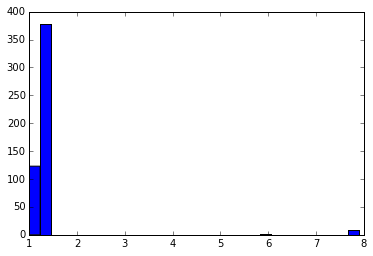

In [33]:
plt.hist(pmed/pmed.min(), bins=30)

In [29]:
pmed/pmed.min()

array([ 1.        ,  1.        ,  1.        ,  1.32440476,  1.        ,
        1.        ,  1.        ,  1.        ,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.        ,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.        ,  1.32440476,  1.32440476,
        1.        ,  1.32440476,  1.32440476,  1.32440476,  1.        ,
        1.32440476,  1.        ,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.        ,
        1.32440476,  1.        ,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32

In [ ]:
# Ahora seleccionamos los que cumplen al menos 1 de 3 criterios: humedad, lluvia, y dias con lluvia
DAT3C=np.vstack((DATH,DATL,DATD))
np.savetxt('datos3c.txt',DAT3C)

In [ ]:
%%bash
awk '{print $0}' datos3c.txt | sort -n | uniq -c > listam3c.txt
rm datos3c.txt

In [ ]:
# tabla de probabilidad (peso) para 3 variables que pueden o no cumplir criterios
def genprob3(cumple):
    if(cumple==3.):
        return 1./8
    if(cumple==2.):
        return (3./8)*(1./4)
    if(cumple==1.):
        return (3./8)*(1./7)
# se multiplica la anterior tabla con la tabla de probabilidad (peso) para el criterio de brillo 
# (casos de 12-24 horas de cielos despejados)
def parseprob3(cumple,brillo):
    if(brillo==2.):
        return genprob3(cumple)*3./4
    if(brillo==1.):
        return genprob3(cumple)*1.
    if(brillo==0.):
        return genprob3(cumple)*1./2

In [ ]:
# generamos una lista con las estaciones que cumplen 1 de 3 criterios, y contamos cuantos de ellos son cumplidos
listam3c=np.loadtxt('listam3c.txt')
# contamos cuantas variables (humedad, lluvia, y dias con lluvia) fueron medidas
df=pd.read_csv('lluvia.csv')
tomados3c=np.zeros(len(listam3c[:,1]))
for i in range(len(listam3c[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam3c[i,1]==df.CODIGO[k]):
            tomados3c[i]+=1
df=pd.read_csv('humedad.csv')
for i in range(len(listam3c[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam3c[i,1]==df.CODIGO[k]):
            tomados3c[i]+=1
df=pd.read_csv('diaslluvia.csv')
for i in range(len(listam3c[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam3c[i,1]==df.CODIGO[k]):
            tomados3c[i]+=1  
# filtramos las que cumplen o pueden cumplir los 3 criterios (es decir, considerando los casos en los que no se midieron algunos de las variables)
pfilter3c=tomados3c-listam3c[:,0]==0
listacorta3c=listam3c[pfilter3c]
# encontramos las estaciones en listacorta3c en las que se tomaron datos de brillo solar
df=pd.read_csv('brillo.csv')
tomados3cB=np.zeros(len(listacorta3c[:,1]))
for i in range(len(listacorta3c[:,1])):
    for k in range(len(df.CODIGO)):
        if(listacorta3c[i,1]==df.CODIGO[k]):
            tomados3cB[i]+=1 
# encontramos las estaciones en listacorta3c que cumplen el criterio de brillo solar
cbrillo3cB=np.zeros(len(listacorta3c[:,1]))
for i in range(len(listacorta3c[:,1])):
    for k in range(len(DATB[:,1])):
        if(listacorta3c[i,1]==DATB[k,0]):
            cbrillo3cB[i]+=1 
# 0=no cumple el criterio de brillo solar, 1=si lo cumple, 2=no fue medido
Brillo=2*(1-tomados3cB)+cbrillo3cB
# genera un arreglo con pesos para cada estación
probarr12=np.zeros(len(Brillo))
for i in range(len(Brillo)):
    probarr12[i]=parseprob3(listacorta3c[i,0],Brillo[i])
# generación de lista expandida que incluye pesos enteros para cada estación
lendata12=(probarr12*112*8).sum().astype(int)
wdata12=(probarr12*112*8).astype(int)
listaexp12=np.zeros((lendata12,5))
kcount=0
for i in range(len(probarr12)):        
    for kinx in range(wdata12[i]):
        listaexp12[kinx+kcount,:]=listacorta3c[i,:]
    kcount=kcount+kinx+1   
# clustering para datos sin escalar
# clustering por mixtura gaussiana de la lista expandida, buscando un mínimo local para el criterio de información bayesiano
# el agrupamiento se hace por lon,lat,alt
cv_types = ['spherical', 'tied', 'diag', 'full']
bicold=0
compo=15
BIC=np.zeros((compo+1,4))
kik=0
for cv_type in cv_types:
    for kcomp in np.arange(compo)+1:        
        gmm = GMM(kcomp, covariance_type=cv_type, random_state=0)
        gmm.fit(listaexp12[:,2:5])
#        if bicold<gmm.bic(listaexp12[:,2:5]):
#        print cv_type,kcomp,gmm.bic(X_scaled[:,2:5]);
        BIC[kcomp,kik]=gmm.bic(listaexp12[:,2:5])
        bicold=gmm.bic(listaexp12[:,2:5])
    kik+=1    
# para los datos sin re-escalar, agrupamiento por mixtura gaussiana de 6 componentes
# para kcomp=9 los importantes son 0,7 pero se mezclan mucho geográficamente
# para kcomp=12 los importantes son 1,2,3,8 pero se mezclan mucho geográficamente 
kcomp=6
gmm = GMM(kcomp, covariance_type='full', random_state=0)
gmm.fit(listaexp12[:,2:5])
cluster_label_stacked12 = gmm.predict(listaexp12[:,2:5])
print kcomp, gmm.bic(listaexp12[:,2:5])
# se almacenan los datos para procesarlos con bash con el fin de colapsar la lista expandida
listastacked12=np.vstack((listaexp12.T,cluster_label_stacked12)).T
np.savetxt('lisstck12.txt',listastacked12)
    





In [ ]:
# peso estadístico para cada estación en listacorta3c
plt.figure(figsize=(12,10))
plt.scatter(-listacorta3c[:,2],-listacorta3c[:,3],c=probarr12,s=100)
plt.colorbar()
plt.scatter(colvec[:,0],colvec[:,1],s=1)
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [ ]:
# distribución de pesos est. vs. altura
plt.scatter(probarr12,listacorta3c[:,4])

In [ ]:
for i, cv_type in zip(range(4),cv_types):
    plt.plot(np.arange(compo+1),BIC[:,i],label=cv_type)
plt.legend()
plt.xlim(0,15)
plt.ylim(150000,240000)
# mínimos locales en 6,9,12 componentes

In [ ]:
%%bash
uniq -c lisstck12.txt > listcomp12.txt
rm lisstck12.txt

In [ ]:
# distribución de grupos vs. altura vs. pesos estadísticos
listcomp12=np.loadtxt('listcomp12.txt')
plt.figure(figsize=(10,6))
plt.scatter(listcomp12[:,6],listcomp12[:,5],c=probarr12*112*8,s=50)
plt.colorbar()

In [ ]:
probfilter=(tomados-listam[:,0]==0)
listacorta=listam[probfilter]
listacortacu=tomadoscu[probfilter]
incog=4-listam[:,0][probfilter]

In [ ]:
Asize=np.hstack((AL.shape[0],AD.shape[0],AH.shape[0],AB.shape[0]))
ptomind=Asize*1./Asize.max()
probtom=np.ones(listacortacu.shape[0])
for i in range(listacortacu.shape[0]):
    for k in range(2,4):
        if(listacortacu[i,k]==1.):
            probtom[i]=probtom[i]*ptomind[k]
        if(listacortacu[i,k]==0.):
            probtom[i]=probtom[i]*(1.-ptomind[k])
        

In [ ]:
np.set_printoptions(suppress=True)
#print np.around(np.hstack((listacortacu,listacortatipo[:,np.newaxis],listacorta[:,0][:,np.newaxis])),1)
np.set_printoptions(suppress=False)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(-listacorta[:,2][incog==3.],-listacorta[:,3][incog==3.],c='b',s=200)
plt.scatter(-listacorta[:,2][incog==2.],-listacorta[:,3][incog==2.],c='g',s=200)
plt.scatter(-listacorta[:,2][incog==1.],-listacorta[:,3][incog==1.],c='y',s=200)
plt.scatter(-listacorta[:,2][incog==0.],-listacorta[:,3][incog==0.],c='r',s=200)
plt.scatter(colvec[:,0],colvec[:,1],s=1)
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [ ]:
def genprob2(paux3,paux4):
    p3=1./4
    p4=1./16
    p33=p3*paux3
    p34=p4*paux4
    return p33+p34  
def parseprob3(i,j):
    if((i==4.)&(j==0.)):
        return genprob2(0.,1.)
    if((i==3.)&(j==1.)):
        return genprob2(0.,1./5)
    if((i==2.)&(j==2.)):
        return genprob2(0.,1./11)
    if((i==1.)&(j==3.)):
        return genprob2(0,1./15)

In [ ]:
probarr3=np.zeros(len(incog))
for i in range(len(incog)):
    probarr3[i]=parseprob3(listacorta[i,0],incog[i])

In [ ]:
# Generamos la lista maestra con el filtro de altura > 1500 msnm
# Sospecho que esto no es necesario
# Aqui usamos la funcion anterior, PP le indica a la funcion cuales grupos me interesan
altfilt=1500
PP=[0,3,4]
DATB=stitch(PP,ALTB,LONB,LATB,CODB,altfilt)
PP=[1]
DATH=stitch(PP,ALTH,LONH,LATH,CODH,altfilt)
PP=[1,4,6,10]
DATL=stitch(PP,ALTL,LONL,LATL,CODL,altfilt)
PP=[0,3,5]
DATD=stitch(PP,ALTD,LOND,LATD,CODD,altfilt)
# Se unen todas las variables en un solo arreglo, nos quedamos con 751 datos (hay repetidos)
# En este arreglo estan todos los datos que cumplen por lo menos uno de los criterios, y quedan a mas de 1500 msnm
# 0=codigo, 1,2=lonlat, 3=altura (segun la funcion stitch)
DATT=np.vstack((DATB,DATH,DATL,DATD))
np.savetxt('datos.txt',DATT)
# Luego unificamos con las estaciones que cumplen al menos un criterio, stdout contiene lo que comunica el proceso
# En este caso no hay nada porque todo quedó escrito en archivo, pero no sobra verificar
proc = subprocess.Popen(["awk '{{print $0}}' datos.txt | sort -n | uniq -c > listam.txt"], stdout=subprocess.PIPE, shell=True)
proc = subprocess.Popen(["rm datos.txt"], stdout=subprocess.PIPE, shell=True)
proc = subprocess.Popen(["ls"], stdout=subprocess.PIPE, shell=True)
listam=np.loadtxt('listam.txt')
stdout = proc.communicate()[0]
stdout.replace("\n"," ")

In [ ]:
# Se unen todas las variables en un solo arreglo, nos quedamos con 751 datos (hay repetidos)
# En este arreglo estan todos los datos que cumplen por lo menos uno de los criterios, y quedan a mas de 1500 msnm
# 0=codigo, 1,2=lonlat, 3=altura (segun la funcion stitch)
DATT_T=np.vstack((DATBT,DATHT,DATLT,DATDT))
np.savetxt('datostodos.txt',DATT_T)
# Luego unificamos con las estaciones que cumplen al menos un criterio, stdout contiene lo que comunica el proceso
# En este caso no hay nada porque todo quedó escrito en archivo, pero no sobra verificar
proc = subprocess.Popen(["awk '{{print $0}}' datostodos.txt | sort -n | uniq -c > listatodos.txt"], stdout=subprocess.PIPE, shell=True)
proc = subprocess.Popen(["rm datostodos.txt"], stdout=subprocess.PIPE, shell=True)
proc = subprocess.Popen(["ls"], stdout=subprocess.PIPE, shell=True)
listatodos=np.loadtxt('listatodos.txt')
stdout = proc.communicate()[0]
stdout.replace("\n"," ")pyum

In [ ]:
# Creo que esto sobra
# Contamos cuantas variables fueron medidas por estacion, se almacena en tomados (cuyo indice coincide con el indice de listam)
# PARA LAS QUE TIENEN FILTRO DE ALTURA > 1500 MSNM
df=pd.read_csv('lluvia.csv')
tomados=np.zeros(len(listam[:,1]))
#tomadoscu=np.zeros((len(listam[:,1]),4))
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1           
df=pd.read_csv('diaslluvia.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1  
df=pd.read_csv('humedad.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1
df=pd.read_csv('brillo.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i]+=1 

In [ ]:
#probabilidad inversa, qué tan probable es cumplir las cuatro condiciones?

for k in range(numtipe):
    paparece=1.
    filter=(tipoest==k)
    myrange=np.arange(tomadoscu.shape[1])[tomadoscu[filter][0]==1]
    for j in myrange:
        paparece*=(cumple[:,j+1]==1).sum()/2046.
    print k,paparece
    pClAnTiI[k]=paparece

In [ ]:
probtipo=np.zeros(len(listacorta))
listacortatipo=np.zeros(len(listacorta))
for i in range(len(listacorta)):
    for k in range(len(tipoest)):
        if(listacorta[i,1]==EST[k,1]):
            probtipo[i]=ptipoe[(tipoest[k]).astype(int)]
            listacortatipo[i]=tipoest[k]
#            print i,k,tipoest[k],ptipoe[tipoest[k]]

In [ ]:
# pesos estadísticos normalizados considerando distribución de alturas para no. de medidas y no. de criterios
aprob=np.vstack((ap1,ap2,ap3,ap4)).T
x = np.linspace(0,4500 , 4501)
normalt=1/aprob.max()/100
probarr=np.zeros(len(probarr3))
for i in range(len(probarr3)):
    pdf=aprob[:,listacorta[i,0].astype(int)-1]
    probarr[i]=probarr3[i]*165*16*np.around(1/pdf/normalt,0)[x==listacorta[i,4]][0]

In [ ]:
# la probabilidad
# de que cumpla los otros tres criterios se calcula independientemente para cada criterio, es decir
# 1036 estaciones cumplieron D, 187 cumplieron H, 227 cumplieron B
# P(C|AnT0)=(1036/2046)*(183/2046)*(227/2046)
pClAnTiD=np.zeros(numtipe)
for k in range(numtipe):
    filter=(tipoest==k)
    paparece=1.
    myrange=np.arange(tomadoscu.shape[1])[np.abs(tomadoscu[filter]-1)[0]==1]
    for j in myrange:
        paparece*=(cumple[:,j+1]==1).sum()*1./len(EST)
    pClAnTiD[k]=paparece    


In [ ]:
medidas=tomadoscu.sum(axis=0)
pTiI=np.zeros(numtipe)
for k in range(numtipe):
    filter=(tipoest==k)
# probabilidad de tener el tipo de estación (independiente)
# probabilidad de medir cada variable por aparte P(Ti)=P(MD)*P(MH)*P(MD)
    pTiI[k]=np.prod((medidas*tomadoscu[filter][0]+(len(EST)-medidas)*np.abs(tomadoscu[filter][0]-1))/len(EST))


In [ ]:
cv_types = ['spherical', 'tied', 'diag', 'full']
Xbic=XprojL
bicold=0
compo=15
BIC=np.zeros((compo+1,4))
kik=0
for cv_type in cv_types:
    for kcomp in np.arange(compo)+1:        
        gmm = GMM(kcomp, covariance_type=cv_type, random_state=0)
        gmm.fit(Xbic)
#        if bicold<gmm.bic(listaexp12[:,2:5]):
#        print cv_type,kcomp,gmm.bic(Xbic);
        BIC[kcomp,kik]=gmm.bic(Xbic)
        bicold=gmm.bic(Xbic)
    kik+=1    
compx=np.arange(compo+1)[1:]
BIC=BIC[1:]
for i, cv_type in zip(range(4),cv_types):
    plt.plot(compx,BIC[:,i],label=cv_type)
plt.legend()
plt.xlim(1,compo)
plt.xlabel("No. of Components")
plt.ylabel("BIC")
minperm=np.argmin(BIC,axis=0)
bicsmin=np.array([])
for i in range(len(minperm)):
    bicsmin=np.append(bicsmin,BIC[minperm[i],i])
covt=cv_types[np.argmin(bicsmin)]
kcomp=minperm[np.argmin(bicsmin)]+1

In [ ]:
# Para humedad, el PCA cubre >95% de varianza
df=pd.read_csv('humedad.csv')

AH=df.as_matrix(columns=df.columns[8:20])
pca = PCA(0.95)  
XprojH = pca.fit_transform(AH)
print "No. of stations that measure this variable = ",XprojH.shape[0],", No. of PCA components (95%) = ",XprojH.shape[1]
print "Explained variance ratio = ", pca.explained_variance_ratio_.sum(axis=0)
print "Explained variance ratio per component = ", pca.explained_variance_ratio_

# para que las gráficas se vean con los mismos ejes
xmin=min(XprojH[:, 0])
xmax=max(XprojH[:, 0])
ymin=min(XprojH[:, 1])
ymax=max(XprojH[:, 1])

# conversión de formato LATLON
latH=np.zeros(len(df.LATITUD))
lonH=np.zeros(len(df.LATITUD))
codeH=np.zeros(len(df.LATITUD))
altH=np.zeros(len(df.LATITUD))
for i in range(len(df.LATITUD)):
    latH[i]=conversion(df.LATITUD[i])
    lonH[i]=conversion(df.LONGITUD[i])
    codeH[i]=df.CODIGO[i]
    altH[i]=df.ELEV[i]
    
cv_types = ['spherical', 'tied', 'diag', 'full']
Xbic=XprojH
bicold=0
compo=15
BIC=np.zeros((compo+1,4))
kik=0
for cv_type in cv_types:
    for kcomp in np.arange(compo)+1:        
        gmm = GMM(kcomp, covariance_type=cv_type, random_state=0)
        gmm.fit(Xbic)
        BIC[kcomp,kik]=gmm.bic(Xbic)
        bicold=gmm.bic(Xbic)
    kik+=1    
compx=np.arange(compo+1)[1:]
BIC=BIC[1:]
for i, cv_type in zip(range(4),cv_types):
    plt.plot(compx,BIC[:,i],label=cv_type)
plt.legend()
plt.xlim(1,compo)
plt.xlabel("No. of Components")
plt.ylabel("BIC")
minperm=np.argmin(BIC,axis=0)
bicsmin=np.array([])
for i in range(len(minperm)):
    bicsmin=np.append(bicsmin,BIC[minperm[i],i])
covt=cv_types[np.argmin(bicsmin)]
kcomp=minperm[np.argmin(bicsmin)]+1
    
    
# Mixtura gaussiana para kcomp clusters
#kcomp=2
gmm = GMM(kcomp, covariance_type=covt, random_state=0)
gmm.fit(XprojH)
cluster_labelH = gmm.predict(XprojH)


# Se hace una gráfica para cada cluster
for kk in range(kcomp):
    D=np.zeros([sum(cluster_labelH==kk),2])
    B=np.zeros([sum(cluster_labelH==kk),12])
    LAT=np.zeros([sum(cluster_labelH==kk)])
    LON=np.zeros([sum(cluster_labelH==kk)])
    ALTH=np.zeros([sum(cluster_labelH==kk)])
    i=0
    for k in range(len(cluster_labelH)):
        if cluster_labelH[k]==kk:
            B[i]=AH[k]
            D[i]=XprojH[k]
            LAT[i]=latH[k]
            LON[i]=lonH[k]
            ALTH[i]=df.ELEV[k]
            i=i+1
    print "Number of stations in cluster %i is %i" %(kk,i)
    plt.figure(figsize=(20,5*kcomp))
    ii=0

#
    plt.subplot(kcomp, 3, ii+1)
    plt.scatter(D[:, 0], D[:, 1],c=ALTH,cmap='cubehelix')
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.xlabel('Comp1')
    plt.ylabel('Comp2')

    xx=np.arange(12)
    plt.subplot(kcomp, 3, ii+2)
    plt.plot(B.mean(axis=0))
    plt.errorbar(xx,B.mean(axis=0),yerr=B.std(axis=0))
    plt.xlabel('Month')
    plt.ylabel('Rel. Humid.')

    plt.subplot(kcomp, 3, ii+3)
    plt.scatter(-LON,-LAT,c=ALTH,cmap='cubehelix')
    plt.colorbar(label='Altitude, Mean Alt.=%i' % ALTH.mean())
    plt.scatter(colvec[:,0],colvec[:,1],s=0.01)
    plt.xlim(-85,-65)
    plt.ylim(-5,14)
    ii=ii+3

# Esto es para graficarlos todos en una misma gráfica de LATLON. Ahora LAT y LON son arrays
LATH=np.zeros([len(cluster_labelH),kcomp])
LONH=np.zeros([len(cluster_labelH),kcomp])
ALTH=np.zeros([len(cluster_labelH),kcomp])
CODH=np.zeros([len(cluster_labelH),kcomp])
for kk in range(kcomp):
    i=0
    for k in range(len(df)):
        if cluster_labelH[k]==kk:
            LATH[i,kk]=latH[k]
            LONH[i,kk]=lonH[k]
            ALTH[i,kk]=df.ELEV[k]
            CODH[i,kk]=df.CODIGO[k]
            i=i+1

In [ ]:
# ahora con lluvia, se requieren 3 componentes para cubrir >95% de varianza
df=pd.read_csv('lluvia.csv')
df.head()

# script que hace todo lo anterior, pero con lluvia, usando lluvia.csv

# Componentes principales
AL=df.as_matrix(columns=df.columns[8:20])
pca = PCA(0.95)  
XprojL = pca.fit_transform(AL)
print(AL.shape)
print(XprojL.shape)
print pca.explained_variance_ratio_.sum(axis=0)
print pca.explained_variance_ratio_
Ncomp = XprojL.shape[1]

# para que las gráficas se vean con los mismos ejes
xmin=min(XprojL[:, 0])
xmax=max(XprojL[:, 0])
ymin=min(XprojL[:, 1])
ymax=max(XprojL[:, 1])

# conversión de formato LATLON
latL=np.zeros(len(df.LATITUD))
lonL=np.zeros(len(df.LATITUD))
codeL=np.zeros(len(df.LATITUD))
altL=np.zeros(len(df.LATITUD))
for i in range(len(df.LATITUD)):
    latL[i]=conversion(df.LATITUD[i])
    lonL[i]=conversion(df.LONGITUD[i])
    codeL[i]=df.CODIGO[i]
    altL[i]=df.ELEV[i]
    
# Mixtura gaussiana para kcomp clusters (4)
kcomp=11
gmm = GMM(kcomp, covariance_type='full', random_state=0)
gmm.fit(XprojL)
cluster_labelL = gmm.predict(XprojL)


# Se hace una gráfica para cada cluster
for kk in range(kcomp):
    D=np.zeros([sum(cluster_labelL==kk),Ncomp])
    B=np.zeros([sum(cluster_labelL==kk),12])
    LAT=np.zeros([sum(cluster_labelL==kk)])
    LON=np.zeros([sum(cluster_labelL==kk)])
    ALTL=np.zeros([sum(cluster_labelL==kk)])
    i=0
    for k in range(len(df)):
        if cluster_labelL[k]==kk:
            B[i]=AL[k]
            D[i]=XprojL[k]
            LAT[i]=latL[k]
            LON[i]=lonL[k]
            ALTL[i]=df.ELEV[k]
            i=i+1
    print "Number of stations in cluster %i is %i" %(kk,i)
    plt.figure(figsize=(20,5*kcomp))
    ii=0

#
    plt.subplot(kcomp, 3, ii+1)
    plt.scatter(D[:, 0], D[:, 1],c=ALTL,cmap='cubehelix')
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.xlabel('Comp1')
    plt.ylabel('Comp2')

    xx=np.arange(12)
    plt.subplot(kcomp, 3, ii+2)
    plt.plot(B.mean(axis=0))
    plt.errorbar(xx,B.mean(axis=0),yerr=B.std(axis=0))
    plt.xlabel('Month')
    plt.ylabel('Precip., Av. =%5.f' % B.mean(axis=0).sum())

    plt.subplot(kcomp, 3, ii+3)
    plt.scatter(-LON,-LAT,c=ALTL,cmap='cubehelix')
    plt.colorbar(label='Altitude, Mean Alt.=%i' % ALTL.mean())
    plt.scatter(colvec[:,0],colvec[:,1],s=0.01)
    plt.xlim(-85,-65)
    plt.ylim(-5,14)
    ii=ii+3
    

In [ ]:
# Esto es para graficarlos todos en una misma gráfica de LATLON. Ahora LAT y LON son arrays
LATL=np.zeros([len(cluster_labelL),kcomp])
LONL=np.zeros([len(cluster_labelL),kcomp])
ALTL=np.zeros([len(cluster_labelL),kcomp])
CODL=np.zeros([len(cluster_labelL),kcomp])
for kk in range(kcomp):
    i=0
    for k in range(len(df)):
        if cluster_labelL[k]==kk:
            LATL[i,kk]=latL[k]
            LONL[i,kk]=lonL[k]
            ALTL[i,kk]=df.ELEV[k]
            CODL[i,kk]=df.CODIGO[k]
            i=i+1

In [ ]:
# ahora con días con lluvia, también toca con tres componentes
df=pd.read_csv('diaslluvia.csv')

#datos crudos mes a mes por estacion - días con lluvia de diaslluvia.csv
#AB=AD[np.isfinite(AD).prod(axis=1).astype(bool),:]
AD=df.as_matrix(columns=df.columns[8:20])
pca = PCA(0.95)  
XprojD = pca.fit_transform(AD)
print(AD.shape)
print(XprojD.shape)
print pca.explained_variance_ratio_.sum(axis=0)
print pca.explained_variance_ratio_
Ncomp = XprojD.shape[1]

# para que las gráficas se vean con los mismos ejes
xmin=min(XprojD[:, 0])
xmax=max(XprojD[:, 0])
ymin=min(XprojD[:, 1])
ymax=max(XprojD[:, 1])

# conversión de formato LATLON
latD=np.zeros(len(df.LATITUD))
lonD=np.zeros(len(df.LATITUD))
codeD=np.zeros(len(df.LATITUD))
altD=np.zeros(len(df.LATITUD))
for i in range(len(df.LATITUD)):
    latD[i]=conversion(df.LATITUD[i])
    lonD[i]=conversion(df.LONGITUD[i])
    codeD[i]=df.CODIGO[i]    
    altD[i]=df.ELEV[i]
# Mixtura gaussiana para kcomp clusters
kcomp=6
gmm = GMM(kcomp, covariance_type='full', random_state=0)
gmm.fit(XprojD)
cluster_labelD = gmm.predict(XprojD)
#df['Cluster1'] = cluster_label

# Se hace una gráfica para cada cluster
for kk in range(kcomp):
    D=np.zeros([sum(cluster_labelD==kk),Ncomp])
    B=np.zeros([sum(cluster_labelD==kk),12])
    LAT=np.zeros([sum(cluster_labelD==kk)])
    LON=np.zeros([sum(cluster_labelD==kk)])
    ALT=np.zeros([sum(cluster_labelD==kk)])
    i=0
    for k in range(len(cluster_labelD)):
        if cluster_labelD[k]==kk:
            B[i]=AD[k]
            D[i]=XprojD[k]
            LAT[i]=latD[k]
            LON[i]=lonD[k]
            ALT[i]=df.ELEV[k]
            i=i+1
    print "Number of stations in cluster %i is %i" %(kk,i)
    plt.figure(figsize=(20,5*kcomp))
    ii=0

#
    plt.subplot(kcomp, 3, ii+1)
    plt.scatter(D[:, 0], D[:, 1],c=ALT,cmap='cubehelix')
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.xlabel('Comp1')
    plt.ylabel('Comp2')

    xx=np.arange(12)
    plt.subplot(kcomp, 3, ii+2)
    plt.plot(B.mean(axis=0))
    plt.errorbar(xx,B.mean(axis=0),yerr=B.std(axis=0))
    plt.xlabel('Month')
    plt.ylabel('Rainy days, Av. =%5.f, Std. =%2.2f' % (B.mean(axis=0).mean(),B.std(axis=0).mean())  )

    plt.subplot(kcomp, 3, ii+3)
    plt.scatter(-LON,-LAT,c=ALT,cmap='cubehelix')
    plt.colorbar(label='Altitude, Mean Alt.=%i' % ALT.mean())
    plt.scatter(colvec[:,0],colvec[:,1],s=0.01)
    plt.xlim(-85,-65)
    plt.ylim(-5,14)
    ii=ii+3
    

In [ ]:
# Esto es para graficarlos todos en una misma gráfica de LATLON. Ahora LAT y LON son arrays
LATD=np.zeros([len(cluster_labelD),kcomp])
LOND=np.zeros([len(cluster_labelD),kcomp])
ALTD=np.zeros([len(cluster_labelD),kcomp])
CODD=np.zeros([len(cluster_labelD),kcomp])

for kk in range(kcomp):
    i=0
    for k in range(len(cluster_labelD)):
        if cluster_labelD[k]==kk:
            LATD[i,kk]=latD[k]
            LOND[i,kk]=lonD[k]
            ALTD[i,kk]=df.ELEV[k]
            CODD[i,kk]=df.CODIGO[k]
            i=i+1

In [ ]:
# ahora con brillo solar
df=pd.read_csv('brillo.csv')

#datos crudos mes a mes por estacion - brillo solar de brillo.csv
AB=df.as_matrix(columns=df.columns[8:20])
pca = PCA(0.95)  
XprojB = pca.fit_transform(AB)
print(AB.shape)
print(XprojB.shape)
print pca.explained_variance_ratio_.sum(axis=0)
print pca.explained_variance_ratio_
Ncomp = XprojB.shape[1]


# para que las gráficas se vean con los mismos ejes
xmin=min(XprojB[:, 0])
xmax=max(XprojB[:, 0])
ymin=min(XprojB[:, 1])
ymax=max(XprojB[:, 1])

# conversión de formato LATLON
latB=np.zeros(len(df.LATITUD))
lonB=np.zeros(len(df.LATITUD))
codeB=np.zeros(len(df.LATITUD))
altB=np.zeros(len(df.LATITUD))
for i in range(len(df.LATITUD)):
    latB[i]=conversion(df.LATITUD[i])
    lonB[i]=conversion(df.LONGITUD[i])
    codeB[i]=df.CODIGO[i]    
    altB[i]=df.ELEV[i]
# Mixtura gaussiana para kcomp clusters
kcomp=5
gmm = GMM(kcomp, covariance_type='tied', random_state=0)
gmm.fit(XprojB)
print gmm.bic(XprojB)
cluster_labelB = gmm.predict(XprojB)

# Se hace una gráfica para cada cluster
for kk in range(kcomp):
    D=np.zeros([sum(cluster_labelB==kk),Ncomp])
    B=np.zeros([sum(cluster_labelB==kk),12])
    LAT=np.zeros([sum(cluster_labelB==kk)])
    LON=np.zeros([sum(cluster_labelB==kk)])
    ALT=np.zeros([sum(cluster_labelB==kk)])
    i=0
    for k in range(len(cluster_labelB)):
        if cluster_labelB[k]==kk:
            B[i]=AB[k]
            D[i]=XprojB[k]
            LAT[i]=latB[k]
            LON[i]=lonB[k]
            ALT[i]=df.ELEV[k]
            i=i+1
    print "Number of stations in cluster %i is %i" %(kk,i)
    plt.figure(figsize=(20,5*kcomp))
    ii=0

#
    plt.subplot(kcomp, 3, ii+1)
    plt.scatter(D[:, 0], D[:, 1],c=ALT,cmap='cubehelix')
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.xlabel('Comp1')
    plt.ylabel('Comp2')

    xx=np.arange(12)
    plt.subplot(kcomp, 3, ii+2)
    plt.plot(B.mean(axis=0))
    plt.errorbar(xx,B.mean(axis=0),yerr=B.std(axis=0))
    plt.xlabel('Month')
    plt.ylabel('Sunshine Duration (Daily), Av. =%.2f' % B.mean(axis=0).mean())

    plt.subplot(kcomp, 3, ii+3)
    plt.scatter(-LON,-LAT,c=ALT,cmap='cubehelix')
    plt.colorbar(label='Altitude, Mean Alt.=%i' % ALT.mean())
    plt.scatter(colvec[:,0],colvec[:,1],s=0.01)
    plt.xlim(-85,-65)
    plt.ylim(-5,14)
    ii=ii+3
    

In [ ]:
# Esto es para graficarlos todos en una misma gráfica de LATLON. Ahora LAT y LON son arrays
LATB=np.zeros([len(cluster_labelB),kcomp])
LONB=np.zeros([len(cluster_labelB),kcomp])
ALTB=np.zeros([len(cluster_labelB),kcomp])
CODB=np.zeros([len(cluster_labelB),kcomp])
for kk in range(kcomp):
    i=0
    for k in range(len(cluster_labelB)):
        if cluster_labelB[k]==kk:
            LATB[i,kk]=latB[k]
            LONB[i,kk]=lonB[k]
            ALTB[i,kk]=df.ELEV[k]
            CODB[i,kk]=df.CODIGO[k]
            i=i+1

In [ ]:
candfilter=cumple.sum(axis=1)!=0

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
def altprob(alt,filter):
    altmax=EST[:,4].max().astype(int)
    from astroML.plotting import setup_text_plots
    setup_text_plots(fontsize=12, usetex=True)
    altmin=0
    X = alt[filter][:, np.newaxis]
    #------------------------------------------------------------
    # Learn the best-fit GMM models
    #  Here we'll use GMM in the standard way: the fit() method
    #  uses an Expectation-Maximization approach to find the best
    #  mixture of Gaussians for the data
    # fit models with 1-11 components
    nmax=np.min([len(alt[filter]),15])
    N = np.arange(1, nmax)
    models = [None for i in range(len(N))]

    for i in range(len(N)):
        models[i] = GMM(N[i]).fit(X)

    # compute the AIC and the BIC
    AIC = [m.aic(X) for m in models]
    BIC = [m.bic(X) for m in models]

    #------------------------------------------------------------
    # Plot the results

    fig = plt.figure(figsize=(10, 4))
    fig.subplots_adjust(left=0.12, right=0.97,
                        bottom=0.21, top=0.9, wspace=0.5)


    # plot 1: data + best-fit mixture
    ax = fig.add_subplot(121)
    M_best = models[np.argmin(AIC)]

    x = np.linspace(altmin,altmax-2, altmax-1)
    logprob, responsibilities = M_best.score_samples(x.reshape((-1,1)))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]


    ax.hist(X, normed=True, histtype='stepfilled', alpha=0.4,bins=range(0,4500,50))
    ax.plot(x, pdf, '-k')
    ax.plot(x, pdf_individual, '--k')
    ax.text(0.04, 0.96, "Best-fit Mixture",
            ha='left', va='top', transform=ax.transAxes)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    ax.set_xlim([0,4500])
    ax.set_ylim([0,0.0016])

    # plot 2: AIC and BIC
    ax = fig.add_subplot(122)
    ax.plot(N, AIC, '-k', label='AIC')
    ax.plot(N, BIC, '--k', label='BIC')
    ax.set_xlabel('n. components')
    ax.set_ylabel('information criterion')
    ax.legend(loc=2)
    plt.show()
    return pdf

In [ ]:
# Si queremos P(h|T0,1) continuas, si no ignorar
proh[:,0]=altprob(listam[:,4],listam[:,0]==0)
proh[:,1]=altprob(listam[:,4],listam[:,0]==1)
# Si queremos P(h) continua, si no ignorar
filter=np.isfinite(EST[:,4])
prohabs=altprob(EST[:,4],filter)

In [ ]:
plt.figure(figsize=(10,10))
filter=(listcomp[:,7]==0)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='k',s=listcomp[:,0][filter])
filter=(listcomp[:,7]==1)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='r',s=listcomp[:,0][filter])
filter=(listcomp[:,7]==2)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='b',s=listcomp[:,0][filter])
filter=(listcomp[:,7]==3)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='y',s=listcomp[:,0][filter])
filter=(listcomp[:,7]==4)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='g',s=listcomp[:,0][filter])
filter=(listcomp[:,7]==5)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='c',s=listcomp[:,0][filter])
filter=(listcomp[:,7]==6)
plt.scatter(-listcomp[:,3][filter],-listcomp[:,4][filter],c='m',s=listcomp[:,0][filter])
plt.scatter(colvec[:,0],colvec[:,1],s=1)
plt.scatter(np.array([-73.06]),np.array([6.3211484]),s=100,c='c')
#plt.colorbar()
plt.xlim(-80,-70)
plt.ylim(0,10)

In [ ]:
k=0
x=EST[critfilter][tipoest[critfilter]==k][:,4]

In [ ]:
from sklearn.neighbors import KernelDensity
from sklearn.grid_search import GridSearchCV

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

In [ ]:
k=1
x=EST[critfilter][tipoest[critfilter]==k][:,4]
x_grid=np.around(np.arange(x.min(),x.max(),1),2)
fig, ax = plt.subplots()
for bandwidth in [ 1, 200, 500]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3)
ax.hist(x, 50, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.set_xlim(x.min(), x.max())
ax.legend(loc='upper left')

In [ ]:
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(1, 100, 10)},
                    cv=13) # 20-fold cross-validation
grid.fit(x[:, None])
print grid.best_params_
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper left')
ax.set_xlim(x.min(), x.max())
